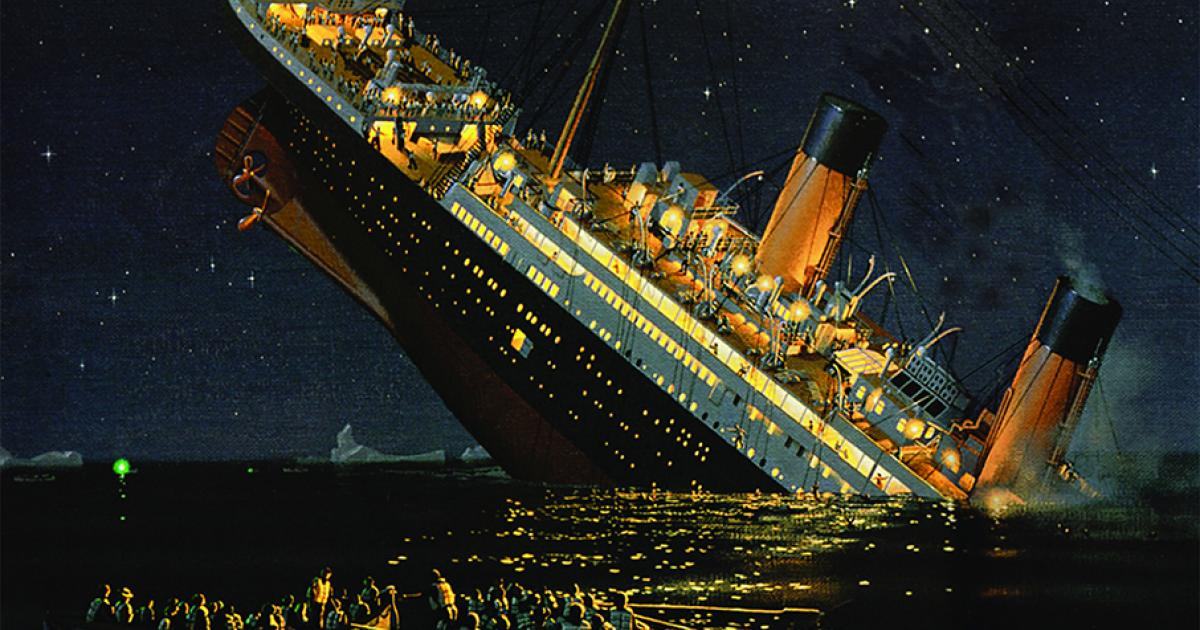

# Data Understanding: Titanic Disaster Data Set

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On 
April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an 
iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy 
shocked the international community and led to better safety regulations for ships.
Titanic data set consist of 12 attributes and 891 instances that were collected from 
passenger’s information for analysis.

## Data Semantics

###### PassengerId:
PassengerId assigns to each passenger. It provides only enough 
information to distinguish one object from another. Therefore it is a nominal and also 
discrete attribute.
##### Survived:
Survived determines whether the passengers survived (1), or not (0). It is 
a categorical (nominal) attribute and also binary attribute that is a special case of 
discrete attributes.
##### Pclass:
It is a nominal and also discrete attribute. It demonstrates the class of the 
passenger which was in first class (1), second class (2), or third class (3).
##### Name:
Name column shows the name of a passenger. It is a nominal attribute.
##### Sex: 
Sex is the gender of the passenger. It can be male or female. The type of that 
attribute is categorical.
##### Age: 
The age of the passenger is illustrated by Age column. Age’s type is numerical
which is the type of continuous attribute. If the value of age is lower than 1, it will be 
fractional and also if the age is estimated, the form of that is xx.5.
###### Parch: 
It assigns the number of parents and children the passenger had on board. 
The type of that attribute is numerical.
##### Ticket: 
It is a nominal attribute. It gives the ticket number of the passenger.
##### Fare: 
Fare column shows that how much the passenger paid for the ticket. It is a 
numerical and also continuous attribute.
##### Cabin: 
It tells which cabin the passenger was in. The type of Cabin column is 
categorical.
##### Embarked: 
Embarked gives an information about where the passenger boarded the 
Titanic. It is a categorical attribute and the values of Embarked are C (Cherbourg), Q 
(Queenstown), and S (Southampton)

# 1. Preparation

## 1.1 Importing Libraries

In [125]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix

from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation
from sklearn.mixture import GaussianMixture 
import scipy.stats as stats
from sklearn import linear_model

## 1.2 Load Dataset

In [126]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

display(df_train.head())
display(df_test.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 1.3 Checking Null Values

In [127]:
pd.DataFrame(data = [df_train.isna().sum()/df_train.shape[0]*100, df_test.isna().sum()/df_test.shape[0]*100], index=["Train Null (%)", "Test Null (%)"]).T.style.background_gradient(cmap='summer_r')

,Train Null (%),Test Null (%)
PassengerId,0.000000,0.000000
Survived,0.000000,nan
Pclass,0.000000,0.000000
Name,0.000000,0.000000
Sex,0.000000,0.000000
Age,19.865320,20.574163
SibSp,0.000000,0.000000
Parch,0.000000,0.000000
Ticket,0.000000,0.000000
Fare,0.000000,0.239234


## 1.4 Checking Duplicate Data

In [128]:
print(f"Train data has {df_train.duplicated().sum()} duplicated data")
print(f"Test data has {df_test.duplicated().sum()} duplicated data")

Train data has 0 duplicated data
Test data has 0 duplicated data


## 1.5 Checking Dataset Information

In [129]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 2. Exploratory Data Analysis

In [130]:
num_var = ["SibSp", "Parch", "Age", "Fare"]
cat_var = ["Sex", "Embarked", "Pclass"]
target = "Survived"

In [131]:
def num_dist(data, var):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(data=data, x=var, kde=True, ax=ax[0])
    sns.boxplot(data=data, x=var, ax=ax[1])
    ax[0].set_title(f"{var} Distribution Histogram")
    ax[1].set_title(f"{var} Distribution Boxplot")

    plt.show()
    
def cat_dist(data, var):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    df_train[var].value_counts().plot(kind="pie", explode=[0.05 for x in data[var].dropna().unique()], autopct='%1.1f%%', ax=ax[0], shadow=True)
    ax[0].set_title(f"{var} Pie Chart")
    ax[0].set_ylabel('')

    count = sns.countplot(x=var, data=df_train, ax=ax[1])
    for bar in count.patches:
        count.annotate(format(bar.get_height()),
            (bar.get_x() + bar.get_width() / 2,
            bar.get_height()), ha='center', va='center',
            size=11, xytext=(0, 8),
            textcoords='offset points')
    ax[1].set_title(f"{var} Bar Chart")
    plt.show()

## 2.1 Checking Target Distribution

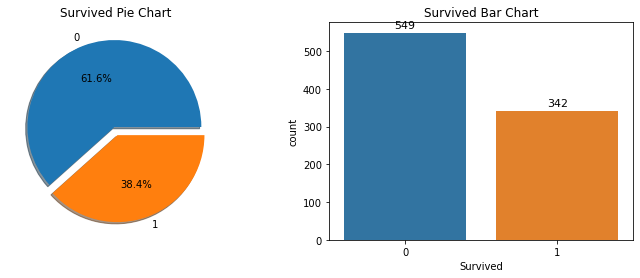

In [132]:
cat_dist(df_train, "Survived")

## 2.2 Checking Predictor Distribution

### 2.2.1 Numerical

In [133]:
df_train[num_var].describe()

,SibSp,Parch,Age,Fare
count,891.000000,891.000000,714.000000,891.000000
mean,0.523008,0.381594,29.699118,32.204208
std,1.102743,0.806057,14.526497,49.693429
min,0.000000,0.000000,0.420000,0.000000
25%,0.000000,0.000000,20.125000,7.910400
50%,0.000000,0.000000,28.000000,14.454200
75%,1.000000,0.000000,38.000000,31.000000
max,8.000000,6.000000,80.000000,512.329200


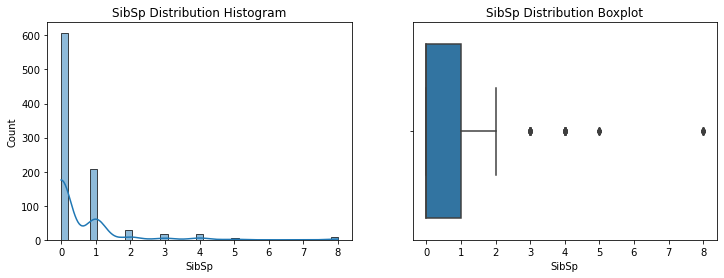

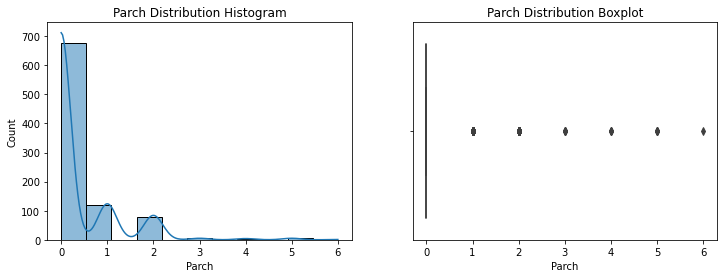

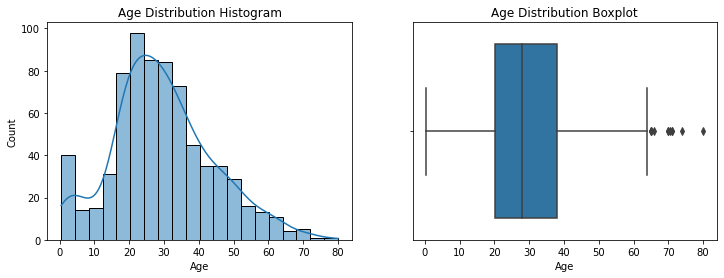

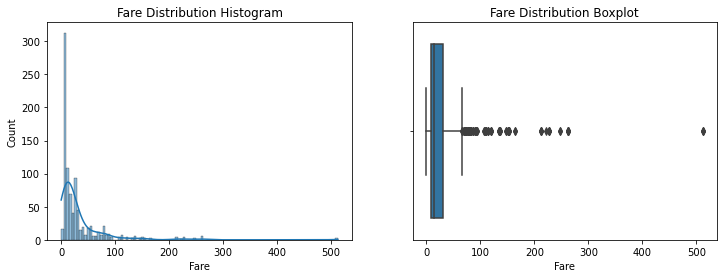

In [134]:
for var in num_var:
    num_dist(df_train, var)

### 2.2.2 Categorical

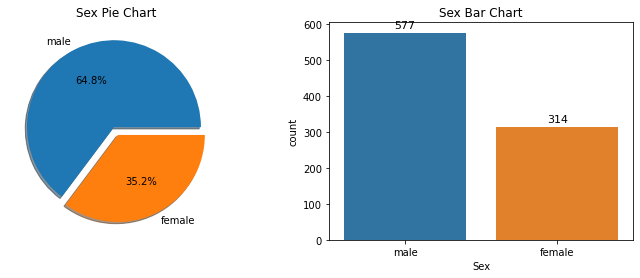

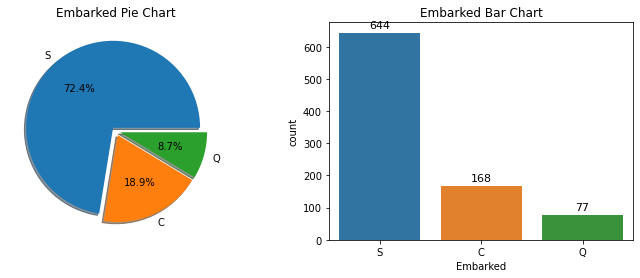

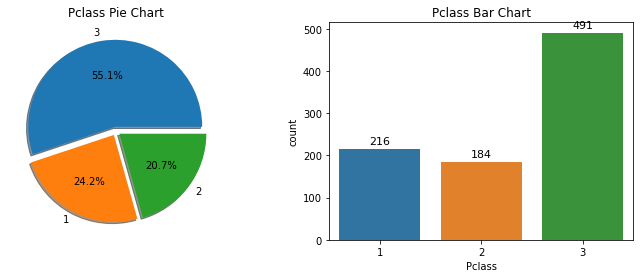

In [135]:
for var in cat_var:
    cat_dist(df_train, var)

## 2.3 Survived vs Not Survived

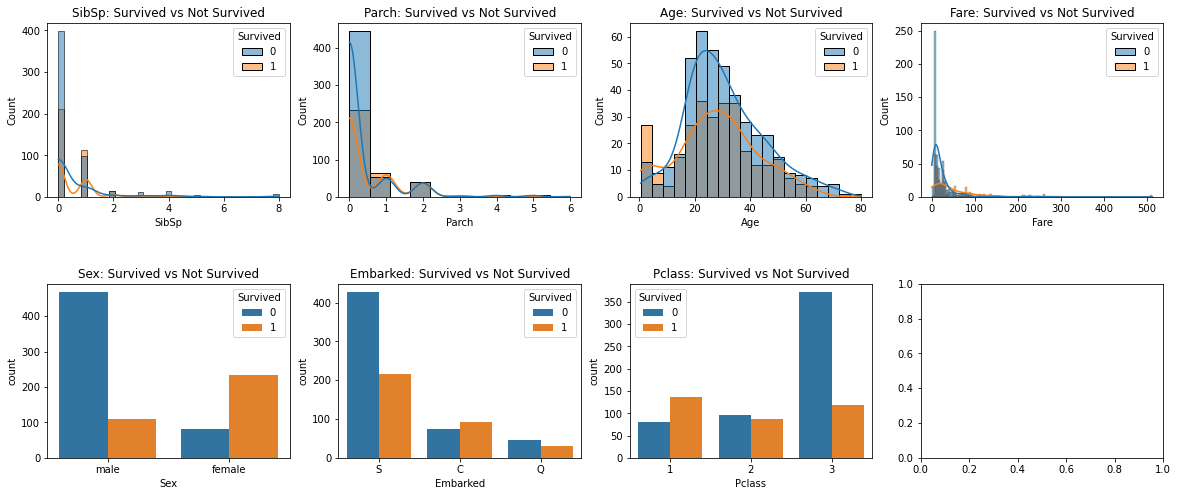

In [136]:
fig, ax = plt.subplots(2, 4, figsize=(20, 8))
ax = ax.flatten()

for i, var in enumerate(num_var+cat_var):
    if i < 4:
        sns.histplot(data=df_train, x=var, hue=target, kde=True, ax=ax[i])
    else:
        sns.countplot(data=df_train, x=var, hue=target, ax=ax[i])
    
    ax[i].set_title(f"{var}: Survived vs Not Survived")
    
plt.subplots_adjust(hspace=0.5)
plt.show()

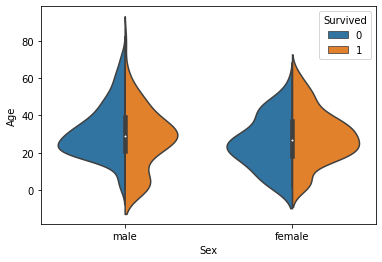

In [137]:
sns.violinplot(data=df_train, x="Sex", y="Age", hue="Survived", split=True)
plt.show()

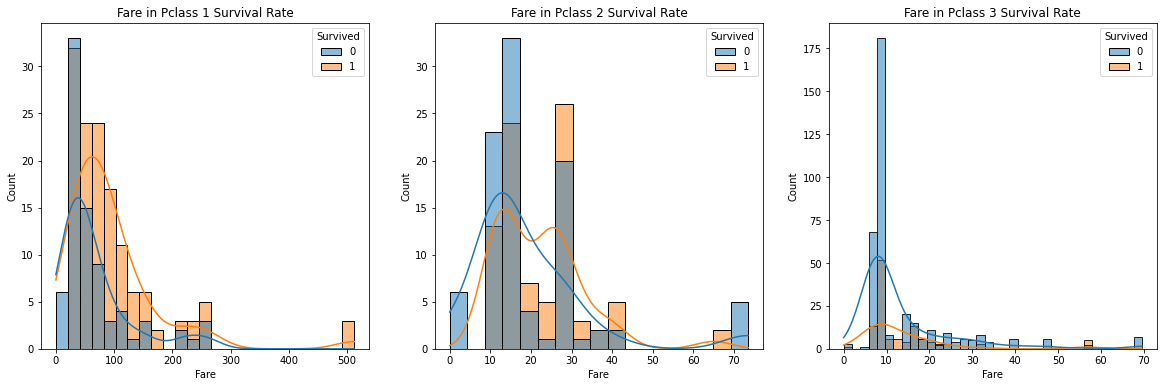

In [138]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

for i, pc in enumerate(sorted(df_train["Pclass"].unique())):
    sns.histplot(data=df_train[df_train["Pclass"]==pc], x="Fare", hue=target, kde=True, ax=ax[i])
    ax[i].set_title(f"Fare in Pclass {pc} Survival Rate")

# 3. Feature Engineering

## 3.1 Passenger Id

In [139]:
df_train["PassengerId"]

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

In [140]:
df_train.drop("PassengerId", axis=1, inplace=True)
df_test.drop("PassengerId", axis=1, inplace=True)

## 3.2 Name

In [141]:
df_train["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [142]:
df_train["Title"] = df_train["Name"].str.extract('([A-Za-z]+)\.')
df_test["Title"] = df_test["Name"].str.extract('([A-Za-z]+)\.')

df_train["Title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Capt          1
Countess      1
Mme           1
Lady          1
Don           1
Sir           1
Jonkheer      1
Ms            1
Name: Title, dtype: int64

In [143]:
def convert_title(title):
    if title in ["Ms", "Mile", "Miss"]:
        return "Miss"
    elif title in ["Mme", "Mrs"]:
        return "Mrs"
    elif title == "Mr":
        return "Mr"
    elif title == "Master":
        return "Master"
    else:
        return "Other"
        
df_train["Title"] = df_train["Title"].map(convert_title)
df_test["Title"] = df_test["Title"].map(convert_title)
df_train["Title"].value_counts()

Mr        517
Miss      183
Mrs       126
Master     40
Other      25
Name: Title, dtype: int64

In [144]:
df_train.drop("Name", axis=1, inplace=True)
df_test.drop("Name", axis=1, inplace=True)

## 3.3 Ticket

In [145]:
df_train["Ticket"]

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [146]:
df_train.drop("Ticket", axis=1, inplace=True)
df_test.drop("Ticket", axis=1, inplace=True)

## 3.4 Cabin

###### This variable has too many missing values in both train and test data (more than 77%), so this variable is missing a lot of information. We will also remove this variable.

In [147]:
df_train.drop("Cabin", axis=1, inplace=True)
df_test.drop("Cabin", axis=1, inplace=True)

## 3.5 Age

In [148]:
df_train.corr()["Age"].sort_values(ascending=False)

Age         1.000000
Fare        0.096067
Survived   -0.077221
Parch      -0.189119
SibSp      -0.308247
Pclass     -0.369226
Name: Age, dtype: float64

###### Their correlation doesn't look so good. Now let's try to check a categorical variable that might be able to classify the age of the passengers, which is Title variable.

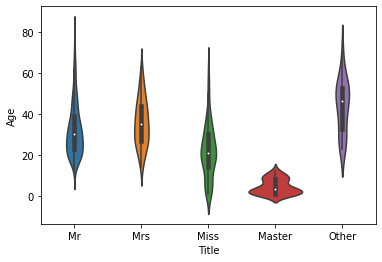

In [149]:
sns.violinplot(data=df_train, x="Title", y="Age")
plt.show()

###### That looks pretty good. We can use Title variable to classify the age of the passengers. Let's check passenger's average age based on their title.

In [150]:
df_train.groupby('Title')['Age'].mean()

Title
Master     4.574167
Miss      21.816327
Mr        32.368090
Mrs       35.788991
Other     43.750000
Name: Age, dtype: float64

Fill in the missing age value using the average passenger age for each title.

In [151]:
data = [df_train, df_test]
for df in data:
    df.loc[(df["Age"].isnull()) & (df["Title"]=='Master'), 'Age'] = 5
    df.loc[(df["Age"].isnull()) & (df["Title"]=='Miss'), 'Age'] = 22
    df.loc[(df["Age"].isnull()) & (df["Title"]=='Mr'), 'Age'] = 32
    df.loc[(df["Age"].isnull()) & (df["Title"]=='Mrs'), 'Age'] = 36
    df.loc[(df["Age"].isnull()) & (df["Title"]=='Other'), 'Age'] = 44

## 3.6 Fare

In [152]:
df_train.corr()["Fare"].sort_values(ascending=False)

Fare        1.000000
Survived    0.257307
Parch       0.216225
SibSp       0.159651
Age         0.092122
Pclass     -0.549500
Name: Fare, dtype: float64

In [153]:
df_test[df_test["Fare"].isna()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
152,3,male,60.5,0,0,NaN,S,Mr


In [154]:
df_test.Fare.fillna(df_train.groupby("Pclass").mean()["Fare"][3], inplace=True)

## 3.8 Categorical Variable Encoding

In [155]:
df_train = pd.get_dummies(df_train, prefix=["Sex", "Embarked", "Title"])
df_test = pd.get_dummies(df_test, prefix=["Sex", "Embarked", "Title"])

# 4. Model Building

## 4.1 Splitting Dataset

In [156]:
X_train = df_train.drop("Survived", axis=1)
Y_train = df_train.Survived

X_test = df_test.copy()

## 4.1.1 Feature Scaling

In [214]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4.2 Building Classification Model

### 4.2.1 Choosing Best Algorithm

In [158]:
classifiers = {
    "LR": LogisticRegression(max_iter=1000), 
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier()
}

results = pd.DataFrame(columns=["Classifier", "Avg_Accuracy", "Avg_F1_Score"])
for name, clf in classifiers.items():
    model = clf
    cv_results = cross_validate(
        model, X_train_scaled, Y_train, cv=10,
        scoring=(['accuracy', 'f1'])
    )

    results = results.append({
        "Classifier": name,
        "Avg_Accuracy": cv_results['test_accuracy'].mean(),
        "Avg_F1_Score": cv_results['test_f1'].mean()
    }, ignore_index=True)
    
results["Avg_Overall"] = (results["Avg_Accuracy"] + results["Avg_F1_Score"]) / 2
results = results.sort_values("Avg_Overall", ascending=False)
results

,Classifier,Avg_Accuracy,Avg_F1_Score,Avg_Overall
0,LR,0.826067,0.764644,0.795356
2,RF,0.808115,0.739739,0.773927
1,DT,0.771061,0.706182,0.738622


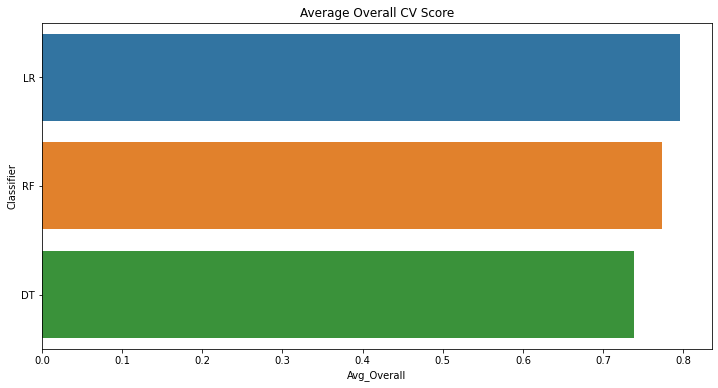

In [159]:
plt.figure(figsize=(12, 6))
sns.barplot(data=results, x="Avg_Overall", y="Classifier")
plt.title("Average Overall CV Score")
plt.show()

### 4.2.2 Hyperparameter Tuning

In [ ]:
lr = LogisticRegression()
params = {
    "penalty": ("l1", "l2", "elasticnet"),
    "tol": (0.1, 0.01, 0.001, 0.0001),
    "C": (10.0, 1.0, 0.1, 0.01)
}
clf = GridSearchCV(lr, params, cv=10)
clf.fit(X_train_scaled, Y_train)
print("Best hyperparameter:", clf.best_params_)

Train Accuracy: 0.8327721661054994
Train F1-Score: 0.7759398496240602


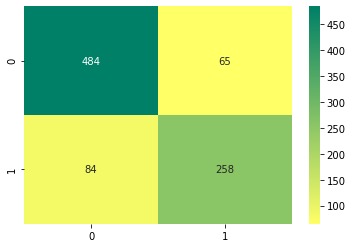

In [215]:
y_pred = clf.predict(X_train_scaled)
print(f"Train Accuracy: {accuracy_score(Y_train, y_pred)}")
print(f"Train F1-Score: {f1_score(Y_train, y_pred)}")
sns.heatmap(confusion_matrix(Y_train, y_pred), fmt='.3g', annot=True, cmap='summer_r')
plt.show()

In [218]:
y_pred = clf.predict(X_test_scaled)

submission = pd.read_csv("gender_submission.csv")
submission["Survived"] = y_pred

In [162]:
print(classification_report(Y_train, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       549
           1       0.80      0.75      0.78       342

    accuracy                           0.83       891
   macro avg       0.83      0.82      0.82       891
weighted avg       0.83      0.83      0.83       891



# 5.CLUSTERING

In [163]:
data = pd.read_csv("train.csv",sep=",")

In [164]:
data1 = data[['Survived','Pclass','Age','SibSp','Parch','Fare']]

In [165]:
data1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [166]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


In [167]:
data2=data1.dropna(axis=0).reset_index(drop=True)

## 5.1 Agglomerative Clustering

In [168]:
def doAgglomerative(X, nclust=2):
    model = AgglomerativeClustering(n_clusters=nclust, affinity = 'euclidean', linkage = 'ward')
    clust_labels1 = model.fit_predict(X)
    return (clust_labels1)

clust_labels1 = doAgglomerative(data2, 5)
agglomerative = pd.DataFrame(clust_labels1)
data2.insert((data2.shape[1]),'agglomerative',agglomerative)

In [169]:
data2.groupby('agglomerative').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
agglomerative,,,,,,
0,0.334507,2.514085,28.484595,0.448944,0.394366,15.877105
1,0.733333,1.000000,32.430667,0.600000,0.866667,131.183883
2,0.653061,1.234694,35.632653,0.795918,0.377551,68.176576
3,1.000000,1.000000,35.333333,0.000000,0.333333,512.329200
4,0.733333,1.000000,30.333333,1.000000,1.333333,239.991940


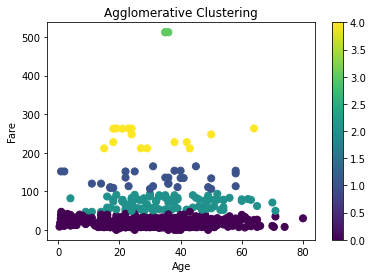

In [170]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data2['Age'],data2['Fare'],c=agglomerative[0],s=50)
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
plt.colorbar(scatter)

## 5.2 K-Means Clustering

In [171]:
del data2
data2=data1.dropna(axis=0).reset_index(drop=True)

In [172]:
def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(data2, 5)
kmeans = pd.DataFrame(clust_labels)
data2.insert((data2.shape[1]),'kmeans',kmeans)

In [173]:
data2.groupby('kmeans').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
kmeans,,,,,,
0,0.335106,2.515957,28.417110,0.437943,0.381206,15.684034
1,0.733333,1.000000,32.430667,0.600000,0.866667,131.183883
2,1.000000,1.000000,35.333333,0.000000,0.333333,512.329200
3,0.637255,1.274510,35.725490,0.843137,0.450980,67.193180
4,0.733333,1.000000,30.333333,1.000000,1.333333,239.991940


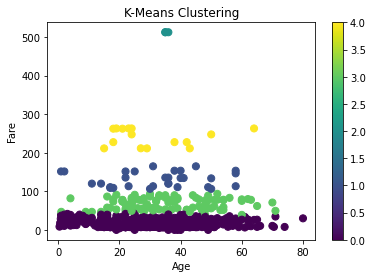

In [174]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data2['Age'],data2['Fare'],c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
plt.colorbar(scatter)

## 5.3 Gaussian Mixture Model Clustering

In [175]:
del data2
data2=data1.dropna(axis=0).reset_index(drop=True)

In [176]:
def doGMM(X, nclust=2):
    model = GaussianMixture(n_components=nclust,init_params='kmeans')
    model.fit(X)
    clust_labels3 = model.predict(X)
    return (clust_labels3)

clust_labels3 = doGMM(data2,5)
gmm = pd.DataFrame(clust_labels3)
data2.insert((data2.shape[1]),'Guassian',gmm)

In [177]:
data2.groupby('Guassian').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Guassian,,,,,,
0,0.406780,2.618644,22.668432,1.194915,0.983051,24.229714
1,0.733333,1.000000,30.333333,1.000000,1.333333,239.991940
2,0.642857,1.000000,38.990595,0.410714,0.327381,66.809450
3,0.246575,2.715753,29.945205,0.000000,0.000000,9.221973
4,1.000000,1.000000,35.333333,0.000000,0.333333,512.329200


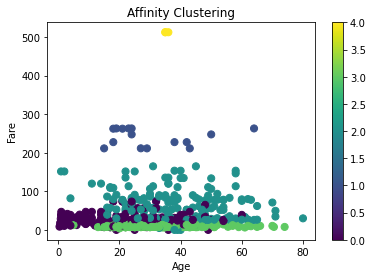

In [178]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data2['Age'],data2['Fare'],c=gmm[0],s=50)
ax.set_title('Affinity Clustering')
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
plt.colorbar(scatter)

## 5.4 Hierarchical Clustering

In [179]:
del data2
data2=data1.dropna(axis=0).reset_index(drop=True)

In [180]:
merg = linkage(data2[0:10], method="ward")
print(merg)

[[  2.           7.           3.9106507    2.        ]
 [  6.           9.           5.30477379   2.        ]
 [  0.          10.           6.15841156   3.        ]
 [  4.          12.          12.34003146   4.        ]
 [  8.          11.          18.2324326    3.        ]
 [  1.           3.          18.42911823   2.        ]
 [  5.          15.          23.5213758    3.        ]
 [ 13.          14.          46.58343356   7.        ]
 [ 16.          17.         102.82744677  10.        ]]


Text(0, 0.5, 'euclidean distance')

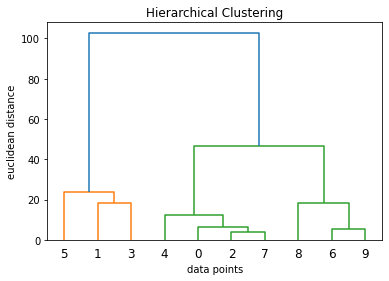

In [181]:
fig = plt.figure()
ax = fig.add_subplot(111)
dendrogram(merg, leaf_rotation = 0)
ax.set_title('Hierarchical Clustering')
ax.set_xlabel('data points')
ax.set_ylabel('euclidean distance')

In [182]:
data2[0:10]

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
5,0,1,54.0,0,0,51.8625
6,0,3,2.0,3,1,21.0750
7,1,3,27.0,0,2,11.1333
8,1,2,14.0,1,0,30.0708
9,1,3,4.0,1,1,16.7000


# 6.Regression

## 6.1 Linear Regression


Linear regression is a predictive modeling technique for predicting a numeric response variable based on one or more explanatory variables. The term "regression" in predictive modeling generally refers to any modeling task that involves predicting a real number (as opposed classification, which involves predicting a category or class.). The term "linear" in the name linear regression refers to the fact that the method models data with linear combination of the explanatory variables. A linear combination is an expression where one or more variables are scaled by a constant factor and added together. In the case of linear regression with a single explanatory variable, the linear combination used in linear regression can be expressed as:

response = intercept + constant ∗ explanatory




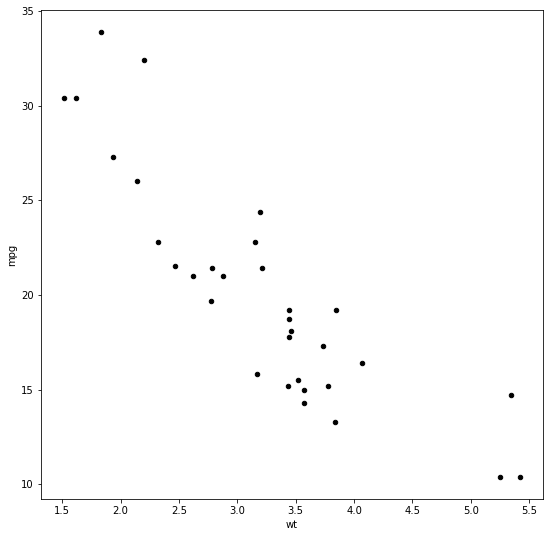

In [183]:
mtcars = pd.read_csv("mtcars.csv")

mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black");

In [184]:
regression_model = linear_model.LinearRegression()
regression_model.fit(X = pd.DataFrame(mtcars["wt"]), 
                     y = mtcars["mpg"])
print(regression_model.intercept_)
print(regression_model.coef_)

37.28512616734204
[-5.34447157]


In [185]:
regression_model.score(X = pd.DataFrame(mtcars["wt"]), 
                       y = mtcars["mpg"])

0.7528327936582646

In [186]:
train_prediction = regression_model.predict(X = pd.DataFrame(mtcars["wt"]))
residuals = mtcars["mpg"] - train_prediction

residuals.describe()

count    3.200000e+01
mean    -4.996004e-15
std      2.996352e+00
min     -4.543151e+00
25%     -2.364709e+00
50%     -1.251956e-01
75%      1.409561e+00
max      6.872711e+00
Name: mpg, dtype: float64

In [187]:
SSResiduals = (residuals**2).sum()

SSTotal = ((mtcars["mpg"] - mtcars["mpg"].mean())**2).sum()
1 - (SSResiduals/SSTotal)

0.7528327936582646

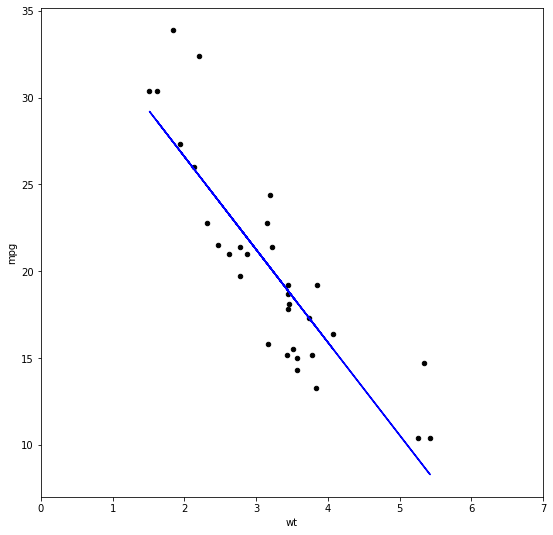

In [188]:

mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black",
           xlim = (0,7))

plt.plot(mtcars["wt"],      
         train_prediction,  
         color="blue");

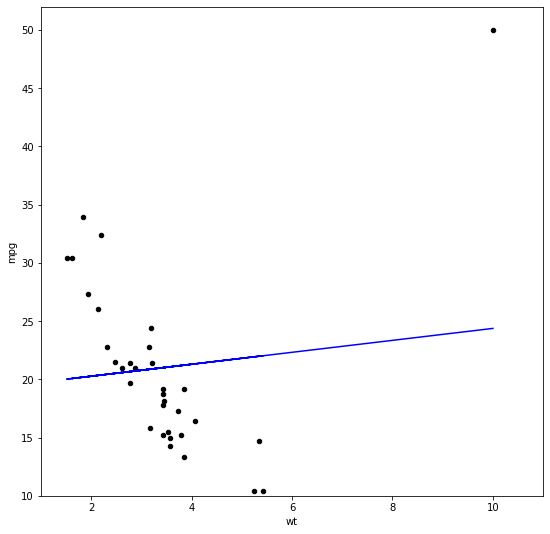

In [189]:
mtcars_subset = mtcars[["mpg","wt"]]

super_car = pd.DataFrame({"mpg":50,"wt":10}, index=["super"])

new_cars = mtcars_subset.append(super_car)


regression_model = linear_model.LinearRegression()


regression_model.fit(X = pd.DataFrame(new_cars["wt"]), 
                     y = new_cars["mpg"])

train_prediction2 = regression_model.predict(X = pd.DataFrame(new_cars["wt"]))


new_cars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black", xlim=(1,11), ylim=(10,52))


plt.plot(new_cars["wt"],     
         train_prediction2,  
         color="blue");

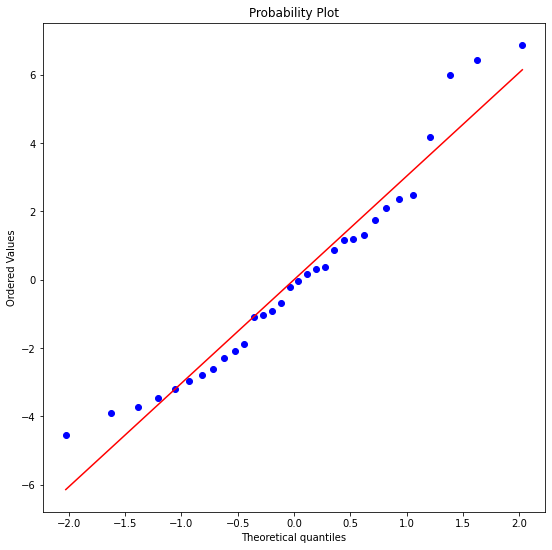

In [190]:
plt.figure(figsize=(9,9))

stats.probplot(residuals, dist="norm", plot=plt);

In [191]:
def rmse(predicted, targets):
    """
    Computes root mean squared error of two numpy ndarrays
    
    Args:
        predicted: an ndarray of predictions
        targets: an ndarray of target values
    
    Returns:
        The root mean squared error as a float
    """
    return (np.sqrt(np.mean((targets-predicted)**2)))

rmse(train_prediction, mtcars["mpg"])

2.949162685955028

In [192]:
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(train_prediction, mtcars["mpg"])**0.5

RMSE

2.949162685955028

## 6.2 Polynomial Regression

Variables often exhibit non-linear relationships that can't be fit well with a straight line. In these cases, we can use linear regression to fit a curved line the data by adding extra higher order terms (squared, cubic, etc.) to the model. A linear regression that involves higher order terms is known as "polynomial regression."

In [193]:

poly_model = linear_model.LinearRegression()


predictors = pd.DataFrame([mtcars["wt"],           
                           mtcars["wt"]**2]).T     


poly_model.fit(X = predictors, 
               y = mtcars["mpg"])


print("Model intercept")
print(poly_model.intercept_)


print("Model Coefficients")
print(poly_model.coef_)

# Check R-squared
print("Model Accuracy:")
print(poly_model.score(X = predictors, 
                 y = mtcars["mpg"]))

Model intercept
49.93081094945178
Model Coefficients
[-13.38033708   1.17108689]
Model Accuracy:
0.8190613581384095


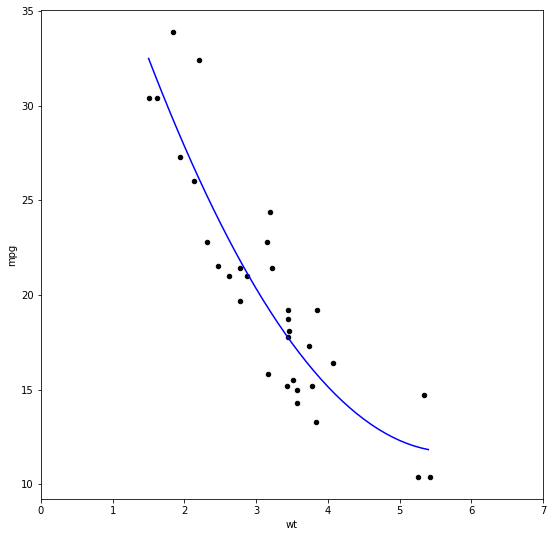

In [194]:
poly_line_range = np.arange(1.5, 5.5, 0.1)


poly_predictors = pd.DataFrame([poly_line_range,
                               poly_line_range**2]).T


y_values = poly_model.predict(X = poly_predictors)

mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black",
           xlim = (0,7))


plt.plot(poly_line_range,   
         y_values,         
         color="blue");

In [195]:
preds = poly_model.predict(X=predictors)

rmse(preds , mtcars["mpg"])

2.5233004724610786

In [196]:

poly_model = linear_model.LinearRegression()

predictors = pd.DataFrame([mtcars["wt"],           
                           mtcars["wt"]**2,
                           mtcars["wt"]**3,
                           mtcars["wt"]**4,
                           mtcars["wt"]**5,
                           mtcars["wt"]**6,
                           mtcars["wt"]**7,
                           mtcars["wt"]**8,
                           mtcars["wt"]**9,
                           mtcars["wt"]**10]).T     

poly_model.fit(X = predictors, 
               y = mtcars["mpg"])

print("Model intercept")
print(poly_model.intercept_)
print("Model Coefficients")
print(poly_model.coef_)
poly_model.score(X = predictors, 
                 y = mtcars["mpg"])

Model intercept
-14921.120127964019
Model Coefficients
[ 6.45813551e+04 -1.20086129e+05  1.26931926e+05 -8.46598441e+04
  3.73155193e+04 -1.10334754e+04  2.16590402e+03 -2.70730542e+02
  1.94974160e+01 -6.15515431e-01]


0.8702106584850604

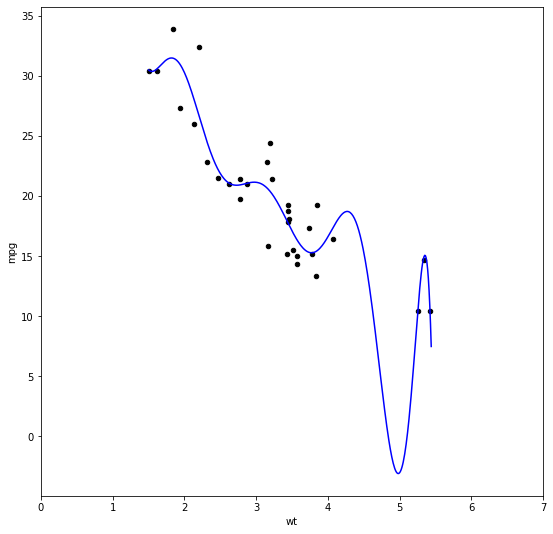

In [197]:
p_range = np.arange(1.5, 5.45, 0.01)

poly_predictors = pd.DataFrame([p_range, p_range**2, p_range**3,
                              p_range**4, p_range**5, p_range**6, p_range**7, 
                              p_range**8, p_range**9, p_range**10]).T  


y_values = poly_model.predict(X = poly_predictors)

mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black",
           xlim = (0,7))


plt.plot(p_range,   
         y_values,         
         color="blue");

## 6.3 Multiple Linear Regression

When faced with a predictive modeling task, you'll often have several variables in your data that may help explain variation in the response variable. You can include more explanatory variables in a linear regression model by including more columns in the data frame you pass to the model training function. Let's make a new model that adds the horsepower variable to our original model:

In [198]:
multi_reg_model = linear_model.LinearRegression()


multi_reg_model.fit(X = mtcars.loc[:,["wt","hp"]], 
                     y = mtcars["mpg"])


print(multi_reg_model.intercept_)


print(multi_reg_model.coef_)


multi_reg_model.score(X = mtcars.loc[:,["wt","hp"]], 
                      y = mtcars["mpg"])

37.227270116447215
[-3.87783074 -0.03177295]


0.8267854518827914

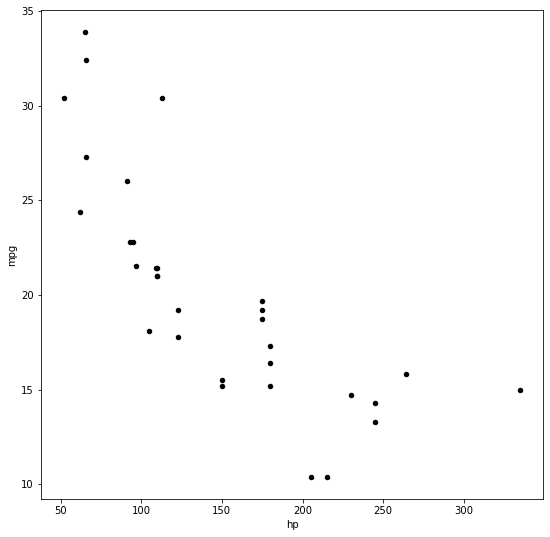

In [199]:
mtcars.plot(kind="scatter",
           x="hp",
           y="mpg",
           figsize=(9,9),
           color="black");

In [200]:
multi_reg_model = linear_model.LinearRegression()


poly_predictors = pd.DataFrame([mtcars["wt"],
                                mtcars["hp"],
                                mtcars["wt"]**2,
                                mtcars["hp"]**2]).T


multi_reg_model.fit(X = poly_predictors, 
                    y = mtcars["mpg"])


print("R-Squared")
print( multi_reg_model.score(X = poly_predictors , 
                      y = mtcars["mpg"]) )


print("RMSE")
print(rmse(multi_reg_model.predict(poly_predictors),mtcars["mpg"]))

R-Squared
0.8907279549670641
RMSE
1.9609108134176985


# CONCLUSION

As a result of our work, we gained valuable experience of building prediction
systems and achieved our best score on Kaggle: 83.27% of correct predictions.

• We performed featured engineering techniques

• Changed alphabetic values to numeric

• Calculated family size

• Extracted title from name and deck label from ticket number

• Used linear regression algorithm to fill in missing ages

• We used several prediction algorithms in python

• Decision tree

• Random forests

• Logistic Regression

• We achieved our best score 83.27% correct predictions
